In [1]:
import pandas as pd
import networkx as nx
import mpbn
from scipy.stats import poisson
from scboolseq import scBoolSeq

import glob 
import numpy as np
import pandas as pd
import sklearn

/home/pro/.pydeps/BNeDiction/scBoolSeq/scboolseq/binarization.py:46: UserWarning: 
Scikit-learn's transform output is set to `default`
Please consider calling `sklearn.set_config(transform_output='pandas')` to set this option globally.
Otherwise use a config context to conserve DataFrame output
>>>with sklearn.config_context(transform_output='pandas'):
>>>    bin_rna_data = scboolseq.scBoolSeq().fit_transform(log_rna_data)
  warnings.warn(


In [2]:
ground_truth_prefix = "../ground-truth/"
workdir = "_workdir"
background_scRNA_seq = "GSE81682_Hematopoiesis.csv"
background_scRNA_seq_src = f"https://github.com/bnediction/scBoolSeq-supplementary/raw/main/data_filtered_vargenes/{background_scRNA_seq}"
output_prefix = "../"

SEED = 21382

In [4]:
background_scRNA_seq_file = f"{workdir}/{background_scRNA_seq}"
! test -f {background_scRNA_seq_file} || (mkdir {workdir} && curl -fL {background_scRNA_seq_src} -o {background_scRNA_seq_file})

In [5]:
ref_data = pd.read_csv(background_scRNA_seq_file, index_col=0)
ref_data.head()

,8430408G22Rik,Plp1,Zfp947,Bhlhb9,Vps35,Slc18a1,Fam107b,Gm14230,Plekhn1,Ankrd6,9030619P08Rik,Prtn3,Lrrn4,Mrgpre,Gm25926,Plppr3,Memo1,Cdkn1c,Gm2a,Phxr4,B2m,Tbxas1,Glipr2,Tcf15,Trim58,D930028M14Rik,1700010I14Rik,Gm10384,Sla2,Trp53i13,Gm17586,Gypc,Clic5,Tubb4b,AC149090.1,Gm26580,Clec1a,Ccl9,Gimap3,Zscan18,Spi1,Ccl6,2900041M22Rik,Klk8,Gm37637,Gp9,Idh3a,Akr1c13,2810408A11Rik,Npr2,Ephx1,Pik3ip1,ENSMUSG00000043858,Gm26789,Grina,Txnip,Gm26541,Dnajb3,Msn,Gm37124,Srd5a1,Bhlhe40,Pomgnt2,Fcer1g,Gm37298,Lmo1,Rab20,Cd69,Gm2788,Gm14276,Napa,Cd24a,Nsun2,Marveld2,Ms4a4b,Gm17590,Cdk6,Tada2b,Gm5113,Mki67,Btg2,Gnat2,Tcaf1,Slc35e4,Reep2,8430419K02Rik,Pdgfd,H2-K1,Sesn1,Bcap29,Gm21814,Eif5a,Stk25,Maged1,Zfp449,9130604C24Rik,6430590A07Rik,Tcirg1,Il4,Slc35a4,Cysltr2,Ap3m2,Dsel,Cmtm7,Arl8b,Gbx2,Smim10l2a,Cyth4,S1pr4,Gdi1,Hdhd3,Vill,Slc38a6,Calu,Gm16565,Smim3,Sar1a,4833407H14Rik,B230217O12Rik,Ccdc39,Spata2l,Arxes2,Dut,Ifngr1,Rasa3,Fbxl2,Pde4b,Ptp4a3,Cdt1,Fxyd1,Arl11,Shisa8,Dleu7,Tmem173,Atxn10,Rpn2,Ccl3,Nudt16,Kif3c,Hars,Ccl4,Myo1g,Cpq,Cox6a2,Sdc3,Dok2,Fcgrt,Elmo1,Cyc1,Calr,Gpr18,Tbxa2r,Gpr183,Naaa,Gm11110,Alad,Taz,Echdc3,Cd300a,Slc39a4,Zfp128,Gm26819,Ispd,Itm2b,Zfp647,Gm16861,Nek3,Gata2,Prss16,Lppos,Lhcgr,Fundc1,Lat,Tnfrsf26,Prr36,Vldlr,Mfge8,Enkur,Rcor2,Ndn,Btla,Zyx,Cd33,Dkc1,Rab37,Cdcp1,Hoxa9,Oat,Vegfc,Gas6,Oasl2,Tacc1,Colgalt1,Xdh,Rab32,Dusp2,Tmem176a,Gnai3,Rnf13,Elane,Cd48,Mthfd1,Igkc,Fnta,Bok,Ripply3,Ptger2,P2rx7,Wdfy2,Eif1a,Gstm7,Tmem14c,2900018N21Rik,Mpl,Sash3,Tgm2,Gm19569,Ehd3,Cish,Calml4,Mesdc2,Nfil3,Tcn2,Saraf,Meis1,Serpina3g,Pcx,Gpr171,Cks1b,Coa5,Arhgap27os3,Farsa,Ctsl,Iigp1,P2ry14,Cd82,Slc18a2,Cd302,Parp12,Isyna1,S100a8,B130034C11Rik,Arhgap27,Klf1,Gm26740,Cd84,Bag2,Tmem123,Emilin1,4930568A12Rik,Clec11a,Mat2a,Tespa1,Wfdc17,Tspan13,Dyrk2,S100a9,F10,Pde1b,Gcnt2,Ppic,Zfp72,Gm4841,Ckb,C130013H08Rik,Spo11,Ctss,Vwa5a,Serpinb1a,Trib3,Slc28a2,Xbp1,Tsc22d3,Cd74,Nhlrc1,Rac2,Il15,Ift43,Tnfrsf13c,Gm10451,Plod2,Minpp1,Cs,Gm21967,Trim27,Rrm1,Krt18,Rap1b,Anxa2,D130040H23Rik,Tmsb4x,1810034E14Rik,2810021J22Rik,F630028O10Rik,Cyb5r3,B3gnt3,Laptm5,Adam11,Rab17,Pkia,Hist3h2ba,Cyp27a1,Zfp36,Mcm5,Ssc4d,Gm45837,Lmcd1,Fgf3,Car1,Adssl1,Il21r,Slc50a1,Serpinb9,Pttg1ip,Fam83d,Tspan32,Tnfrsf13b,Gdi2,Nim1k,Mapk12,Wfdc18,Thbs1,Chil5,Mpst,Selenop,Gm43852,Hk3,Irgm1,Nceh1,Myl10,Tmx1,Zcchc24,Acsl5,Tnfaip8,4632427E13Rik,Hspa9,Hid1,Gstt1,Il12rb1,Ficd,Bbs10,Esam,Unc93b1,Casp4,F2r,Dynlt3,Adgrg1,Tmem38a,Stap1,Cep170b,Lpxn,Frmd8,Doc2g,Ighv1-23,Hrh2,Bgn,Ifi206,Fes,Apol7e,Srl,Ifi47,Cdca7,Srm,Smagp,Zfp418,Zfp882,Mmp2,Fam32a,Flna,Lyz2,Cd53,Mapk11,Sptbn1,Mapre3,Nr0b2,Ptprc,Gulp1,Cd63,Nsg1,Fam131a,Dntt,Ifi213,Tcp1,Stard8,Clptm1l,Sigirr,Robo3,Il17rb,Mcfd2,Vpreb1,Casp12,Zbtb3,Ppt1,H1f0,C730034F03Rik,Tpst2,Pnrc1,Sdhaf2,Hnrnpdl,Cyp7b1,Ptpre,Slc25a45,Wdr35,Capg,Sf3b3,Gata1,Spry1,Abce1,Rnf180,Golph3l,P2ry10,Adgrg3,Fkbp4,F2rl2,Gbp2,Plcg2,Ccdc189,4930486L24Rik,E230001N04Rik,Itih5,Chrnb1,Gm16386,Thnsl2,Gm16712,Top2a,Gm5577,Nt5c3,Nlrp10,Ctf1,Il18bp,Il1rl2,Gm5148,Car2,Vim,A630033H20Rik,Cd81,Zfp563,Ctla2a,Mfsd2b,Idh2,Tert,Pwwp2b,Atp6ap2,Ces2g,Gba2,4931428F04Rik,Apoe,Sdha,Dlg3,Igkv4-50,Dhx58,Zfp661,Ccr9,Rgs2,Ctsc,Parp8,Tspo2,5430420F09Rik,Pear1,Ltb,Gm26512,AA467197,Unc5cl,Mtpn,Mcm6,Atp2a3,Tyms,Il12a,Celf2,Axl,Tpm4,Gm3739,Cyp2j9,Fxyd5,B230216N24Rik,Trbc2,Fam161b,Gm30948,Apbb1,Igfbp4,Pcp4l1,Rassf5,Cyp2r1,Smoc1,Srgn,Pygm,Gm43200,Gca,Arhgef6,Fah,BC017643,Ak3,Icam1,Gm10505,C1qbp,Efna1,AW112010,Tnks1bp1,Anxa1,Fgf11,Layn,Gm19331,Rbpms2,Tspan3,Ighv9-1,Gm43201,Arrdc1,Hjurp,4921507P07Rik,Sla,Ms4a6b,Zfp551,2810468N07Rik,Tnf,Serp1,Mfap2,Arhgef18,Slc25a29,Hmox1,Pkm,Arhgap15,Ddx39,Fv1,Gnb5,Tes,Lysmd2,Mmp11,Pgrmc1,Gm42979,Efna4,Uba7,Xist,Sumo3,Flt3,Mycn,1300017J02Rik,Scn1b,Rab38,ENSMUSG00000096970,Tnfaip2,Hdac2,Ccr7,Irf6,Mndal,Fut4,Casp1,Slc14a1,Rit1,Ifi203,Zfp93,Calr3,2210010C04Rik,Gm38243,Gm43313,Slc25a5,Bcam,Ighv1-74,Traf3ip3,Lgals9,Gm26982,Clec10a,Klhl8,Islr,Ighv1-76,Crlf3,Ighv1-77,Lcp2,Rapsn,Cd38,Gm37423,Selplg,Clip3,Ccdc157,Uggt2,Mpo,Eya1,Ctso,Gm26917,Rarb,Cmtm6,Metrnl,Rgs1,Ptpn6,Cd1d1,Lyrm1,Prkaa2,Gm4759,Aplp

In [6]:
with sklearn.config_context(transform_output="pandas"):
    scbool = scBoolSeq().fit(ref_data)

/home/pro/.cache/pypoetry/virtualenvs/base-cj2A8Mdc-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [7]:
!mkdir -p {output_prefix}timeseries/

In [8]:
def extract_dyn_from_trajdf(traj_df):
    dyn = nx.DiGraph()
    states = list(sorted(traj_df.index))
    for i, state in enumerate(states):
        dyn.add_node(state)
        if "_to_" in state:
            parts = state.split("_")
            num = int(parts[-1])
            if num == 1:
                prev = parts[0]
            else:
                prev = states[i-1]
            dyn.add_edge(prev, state)
            succ = states[i+1].split("_") if i < len(states)-1 else []
            if succ[:3] != parts[:3]:
                dyn.add_edge(state, parts[2])
    return dyn

def extract_paths_from_dyn(dyn):
    inits = [state for state in dyn.nodes() if dyn.in_degree(state) == 0]
    assert len(inits) == 1
    finals = [state for state in dyn.nodes() if dyn.out_degree(state) == 0]
    paths = [next(iter(nx.simple_paths.shortest_simple_paths(dyn, inits[0], final))) for final in finals]
    return paths

def get_path_probs_at_timestep(path, T):
    P = poisson.pmf(range(len(path)), T)
    P[-1] += 1-sum(P)
    P /= max(P)
    return P

def make_nb_samples_at_timestamp(traj_df, paths, T, nbcells=(400,600)):
    n_cells = np.random.randint(*nbcells, size=len(traj_df.index))
    idx = traj_df.index.to_list()
    n_samples = [0]*len(idx)
    probs = [0]*len(idx)
    for p in paths:
        Probs = get_path_probs_at_timestep(p, T)/len(paths)
        for state, prob in zip(p, Probs):
            i = idx.index(state)
            probs[i] += prob
    for i, prob in enumerate(probs):
        n_samples[i] = np.random.binomial(n_cells[i], prob)
    return n_samples

In [9]:
def expand_bindata(traj_df, n_samples):
    d = traj_df.copy(deep=True).values.repeat(n_samples, axis=0)
    return pd.DataFrame(d, columns=traj_df.columns)

def push_mutants_counts(counts, name):
    for label, mutant_counts in counts.groupby(lambda idx: idx.split("#")[0]):
        label = label.replace('@', '-T')
        mutant_counts.index = [idx[idx.index("#")+1:] for idx in mutant_counts.index]
        print(label, name)
        mutant_counts.T.to_csv(f"{output_prefix}timeseries/{label}-{name}.csv")

def make_mutant_counts(traj_df, n_samples, SEED=SEED):
    bindata = expand_bindata(traj_df, n_samples)
    for args, name in [({}, "normalized-scRNAseq-dropouts")]:
        counts = scbool.sample_counts(bindata, n_samples_per_state=1, random_state=SEED)
        counts.index = [f"{x}_{y}" for i,x in enumerate(traj_df.index) for y in range(n_samples[i])]
        counts.index.name = "cellID"
        push_mutants_counts(counts, name)

In [10]:
traj_df = pd.read_csv(ground_truth_prefix + "wt-boolean-trajectories.csv", index_col=0)
traj_df.index

Index(['init', 'init_to_steady1_1', 'init_to_steady1_2', 'init_to_steady1_3',
       'init_to_steady1_4', 'init_to_steady1_5', 'init_to_steady1_6',
       'init_to_steady1_7', 'init_to_steady1_8', 'init_to_steady1_9',
       'steady1'],
      dtype='object')

# computing graph layout...


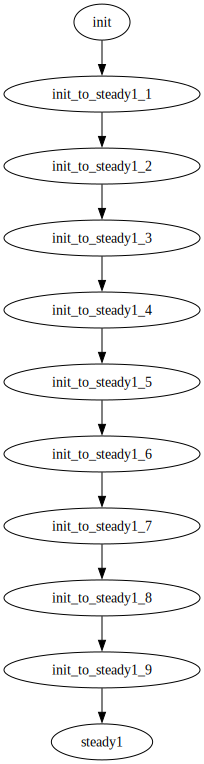

In [12]:
extract_dyn_from_trajdf(traj_df)

In [13]:
_suffix = "-boolean-trajectories.csv"
_dfs = []
n_samples = []
for i, traj_file in enumerate(glob.glob(f"{ground_truth_prefix}*{_suffix}")):
    label = traj_file[len(ground_truth_prefix):-len(_suffix)]
    print(label)
    traj_df = pd.read_csv(traj_file, index_col=0)
    dyn = extract_dyn_from_trajdf(traj_df)
    paths = extract_paths_from_dyn(dyn)
    STEPS = np.linspace(1, max(len(p) for p in paths), 5).astype(int)
    print(STEPS)
    for T in STEPS:
        _df = traj_df.copy()
        _dfs.append(_df)
        _df.index = [f"{label}@{T}#{i}" for i in traj_df.index]
        n_samples += make_nb_samples_at_timestamp(traj_df, paths, T)
trajs_df = pd.concat(_dfs)
make_mutant_counts(trajs_df, n_samples)

gene6KO
[ 1  3  5  7 10]
gene8KO
[ 1  3  5  7 10]
gene3KO
[ 1  3  5  7 10]
gene1KO
[ 1  3  5  7 10]
gene4KO
[ 1  3  5  7 10]
gene10KO
[ 1  3  5  7 10]
gene7KO
[ 1  3  5  7 10]
gene5KO
[ 1  3  5  7 10]
gene2KO
[ 1  3  5  7 10]
gene9KO
[ 1  3  5  7 10]
wt
[ 1  3  6  8 11]


/home/pro/.pydeps/BNeDiction/scBoolSeq/scboolseq/simulation.py:862: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "Skewness": ss.skew(trajectory),
/home/pro/.pydeps/BNeDiction/scBoolSeq/scboolseq/simulation.py:863: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  "Kurtosis": ss.kurtosis(trajectory),
/home/pro/.cache/pypoetry/virtualenvs/base-cj2A8Mdc-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


gene10KO-T1 normalized-scRNAseq-dropouts
gene10KO-T10 normalized-scRNAseq-dropouts
gene10KO-T3 normalized-scRNAseq-dropouts
gene10KO-T5 normalized-scRNAseq-dropouts
gene10KO-T7 normalized-scRNAseq-dropouts
gene1KO-T1 normalized-scRNAseq-dropouts
gene1KO-T10 normalized-scRNAseq-dropouts
gene1KO-T3 normalized-scRNAseq-dropouts
gene1KO-T5 normalized-scRNAseq-dropouts
gene1KO-T7 normalized-scRNAseq-dropouts
gene2KO-T1 normalized-scRNAseq-dropouts
gene2KO-T10 normalized-scRNAseq-dropouts
gene2KO-T3 normalized-scRNAseq-dropouts
gene2KO-T5 normalized-scRNAseq-dropouts
gene2KO-T7 normalized-scRNAseq-dropouts
gene3KO-T1 normalized-scRNAseq-dropouts
gene3KO-T10 normalized-scRNAseq-dropouts
gene3KO-T3 normalized-scRNAseq-dropouts
gene3KO-T5 normalized-scRNAseq-dropouts
gene3KO-T7 normalized-scRNAseq-dropouts
gene4KO-T1 normalized-scRNAseq-dropouts
gene4KO-T10 normalized-scRNAseq-dropouts
gene4KO-T3 normalized-scRNAseq-dropouts
gene4KO-T5 normalized-scRNAseq-dropouts
gene4KO-T7 normalized-scRNAseq